What are the most demanded skills for the top 3 most popular data roles

Methodology

    1. Clean-up skill column
    2. Calculate skill count based on job_title_short
    3. Calculate skill percentage
    4. Plot final findings

In [39]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load_Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Date_CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\user\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Tue Jun 10 20:06:45 2025).


In [4]:
df_UK = df[df['job_country']=='United Kingdom'].copy()
df_US = df[df['job_country']=='United States']

In [8]:
df_skills_US = df_US.explode('job_skills')
df_skills_UK = df_UK.explode('job_skills')

In [9]:
df_skills_count_US = df_skills_US.groupby(['job_skills', 'job_title_short']).size()
df_skills_count_UK = df_skills_UK.groupby(['job_skills', 'job_title_short']).size()

In [10]:
print(df_skills_count_UK)

df_skills_count_US

job_skills  job_title_short          
airflow     Business Analyst                1
            Cloud Engineer                  6
            Data Analyst                   41
            Data Engineer                1062
            Data Scientist                141
                                         ... 
zoom        Machine Learning Engineer       3
            Senior Data Analyst             2
            Senior Data Engineer            6
            Senior Data Scientist           4
            Software Engineer               1
Length: 1419, dtype: int64


job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [11]:
df_skills_count_US = df_skills_count_US.reset_index(name='skill_count')
df_skills_count_UK = df_skills_count_UK.reset_index(name='skill_count')

In [12]:
df_skills_count_UK.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count_US.sort_values(by='skill_count', ascending=False, inplace=True)

In [15]:
job_titles = df_skills_count_US['job_title_short'].unique().tolist()

job_titles =sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

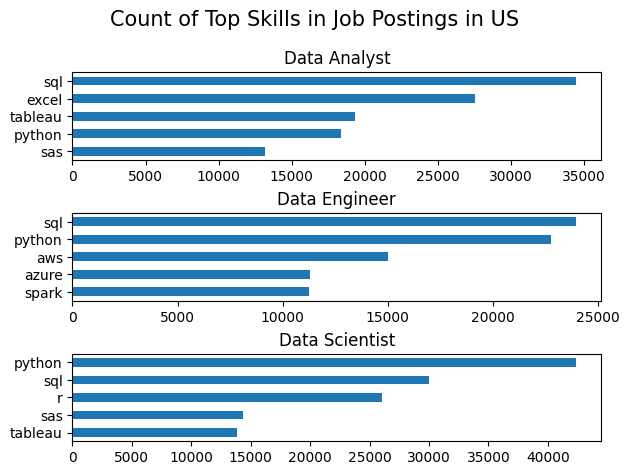

In [20]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot_US = df_skills_count_US[df_skills_count_US['job_title_short']==job_title].head(5)
    df_plot_US.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Job Postings in US', fontsize=15)
fig.tight_layout(h_pad=0.5)

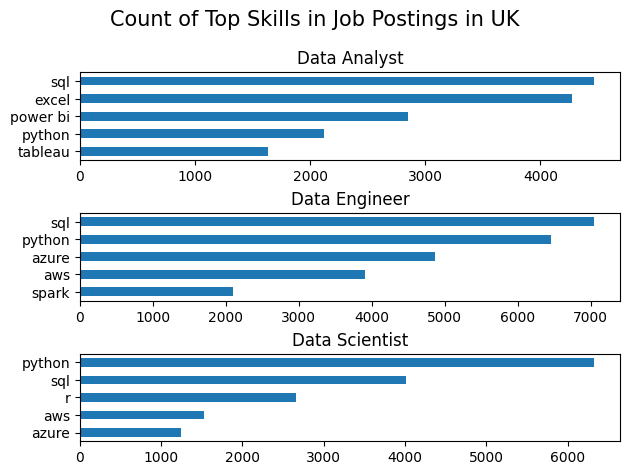

In [21]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot_UK = df_skills_count_UK[df_skills_count_UK['job_title_short']==job_title].head(5)
    df_plot_UK.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Job Postings in UK', fontsize=15)
fig.tight_layout(h_pad=0.5)

In [22]:
df_skills_count_UK

,job_skills,job_title_short,skill_count
1163,sql,Data Engineer,7050
915,python,Data Engineer,6462
916,python,Data Scientist,6329
88,azure,Data Engineer,4865
1162,sql,Data Analyst,4467
...,...,...,...
1368,vue.js,Software Engineer,1
1367,vue.js,Senior Data Engineer,1
514,javascript,Machine Learning Engineer,1
551,julia,Software Engineer,1


In [27]:
df_job_title_count_US = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count_UK =df_UK['job_title_short'].value_counts().reset_index(name='jobs_total')

In [30]:
df_skills_perc_US = pd.merge(df_skills_count_US, df_job_title_count_US, how='left', on='job_title_short')
df_skills_perc_UK = pd.merge(df_skills_count_UK, df_job_title_count_UK, how='left', on='job_title_short')

df_skills_perc_US

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,vue.js,Business Analyst,1,7382
1866,arch,Business Analyst,1,7382
1867,asana,Machine Learning Engineer,1,921
1868,no-sql,Machine Learning Engineer,1,921


In [33]:
df_skills_perc_US['skills_percent'] = 100 * df_skills_perc_US['skill_count'] / df_skills_perc_US['jobs_total']
df_skills_perc_UK['skills_percent'] = 100 * df_skills_perc_UK['skill_count'] / df_skills_perc_UK['jobs_total']

In [37]:
df_skills_perc_UK

,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,sql,Data Engineer,7050,11807,59.710341
1,python,Data Engineer,6462,11807,54.730245
2,python,Data Scientist,6329,9148,69.184521
3,azure,Data Engineer,4865,11807,41.204370
4,sql,Data Analyst,4467,10482,42.615913
...,...,...,...,...,...
1414,vue.js,Software Engineer,1,541,0.184843
1415,vue.js,Senior Data Engineer,1,3337,0.029967
1416,javascript,Machine Learning Engineer,1,317,0.315457
1417,julia,Software Engineer,1,541,0.184843


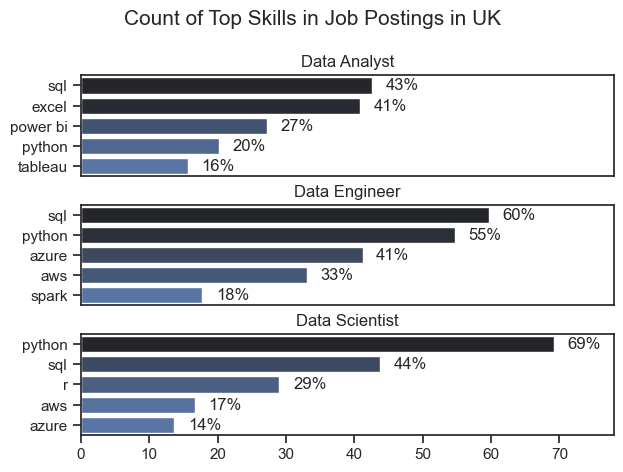

In [43]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot_UK = df_skills_perc_UK[df_skills_perc_UK['job_title_short']==job_title].head(5)
    # df_plot_UK.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title) (changing to seaborn)
    sns.barplot(data=df_plot_UK, x='skills_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 78)
    ax[i].legend().set_visible(False)

    for n, v in enumerate(df_plot_UK['skills_percent']):
        ax[i].text(v + 2, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Count of Top Skills in Job Postings in UK', fontsize=15)
fig.tight_layout(h_pad=0.5)

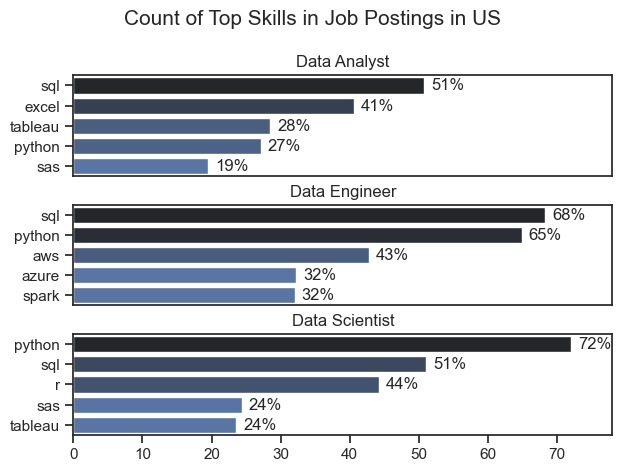

In [51]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot_US = df_skills_perc_US[df_skills_perc_US['job_title_short']==job_title].head(5)
    # df_plot_UK.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title) (changing to seaborn)
    sns.barplot(data=df_plot_US, x='skills_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 78)
    ax[i].legend().set_visible(False)

    for n, v in enumerate(df_plot_US['skills_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Count of Top Skills in Job Postings in US', fontsize=15)
fig.tight_layout(h_pad=0.5)